# **<font color='red'>Define the project</font>**


## Problem
* Cancer is the second leading cause of death in the USA. 
<br>
* Cancers can originate from different organs and exhibit various subtypes.
<br>
* It is vital to constantly develop new biomarkers for cancer diagnosis and drugs for cancer treatment.


## Proposal
<font size=5>To address the issues described above, we used machine learning aided strategy to speed up drug screen and optimization. By building such model, we will have benefits as described below:</font>

* It greatly speed up the process on drug discovery and optimization.   
<br>
* It greatly decreased the cost.   
<br>
* Model generated can be used to predict activity of new chemicals.   
<br>
* Insights from studing important features for the model direct drug optimization  


## Solution

<font size=4>To acheive the goal, we executed the project in 3 steps:

* First, we 
We will try several models with different algorithms for a model with good performance on both accuracy and interpretability.

## Process

<font size=5>We are goind to process data and build a machine learning model as outlined below: 

#### 1.  Data cleaning
#### 2.  EDA and 
#### 3.  Feature engineering
#### 4.  Modeling selection
#### 6.  Final model 
#### 7.  Model interpretation (feature importance and insights)

In [39]:
import numpy as np
import pandas as pd
import pubchempy as pcp
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [40]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import RDConfig
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

## 1. Data import and cleaning

In [38]:
df = pd.read_csv('P450_2d6_binary.csv')
df

,Pubchem_SID,Pubchem_CID,SMILES,Activity_Outcome
0,842618,644890.00,CC(C)(C)N1C(=NN=N1)C(C2=CC=CC=C2OC)N3CCN(CC3)C...,Active
1,842953,6602688.00,C1COCCN1CCN2C3=CC=CC=C3N(C2=N)CC(=O)C4=CC(=C(C...,Active
2,843526,645818.00,COC1=CC=CC2=C1NC=C(C2=O)C(=O)NCC3=CC=CS3,Active
3,843662,645965.00,CC1CC2=CC=CC=C2N1C(=O)CN3CCC(CC3)N4C5=C(C=C(C=...,Active
4,844085,646395.00,CCSC1=C(C2(CCCCC2)C(=C(N1)N)C#N)C#N,Active
...,...,...,...,...
13905,26751437,16758815.00,C=CC1=C[C@H]([C@H]2[C@@H](C13OCCCO3)O2)O,Inactive
13906,26751438,16758816.00,C1COC2([C@@H]3[C@H](O3)[C@H]([C@@H]4C2=CC[C@H]...,Inactive
13907,26751439,16758817.00,CCN1C(=O)[C@H]2CC=C3[C@H]([C@H]2C1=O)[C@@H]([C...,Inactive
13908,26751440,16758818.00,C[C@H](C1=CC=CC=C1)N2C(=O)[C@@H]3CC[C@H]4[C@H]...,Inactive


In [6]:
df.isna().sum()

Pubchem_SID          0
Pubchem_CID         14
SMILES              14
Activity_Outcome     0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isna().sum()

Pubchem_SID         0
Pubchem_CID         0
SMILES              0
Activity_Outcome    0
dtype: int64

In [8]:
df

,Pubchem_SID,Pubchem_CID,SMILES,Activity_Outcome
0,842618,644890.0,CC(C)(C)N1C(=NN=N1)C(C2=CC=CC=C2OC)N3CCN(CC3)C...,Active
1,842953,6602688.0,C1COCCN1CCN2C3=CC=CC=C3N(C2=N)CC(=O)C4=CC(=C(C...,Active
2,843526,645818.0,COC1=CC=CC2=C1NC=C(C2=O)C(=O)NCC3=CC=CS3,Active
3,843662,645965.0,CC1CC2=CC=CC=C2N1C(=O)CN3CCC(CC3)N4C5=C(C=C(C=...,Active
4,844085,646395.0,CCSC1=C(C2(CCCCC2)C(=C(N1)N)C#N)C#N,Active
...,...,...,...,...
13905,26751437,16758815.0,C=CC1=C[C@H]([C@H]2[C@@H](C13OCCCO3)O2)O,Inactive
13906,26751438,16758816.0,C1COC2([C@@H]3[C@H](O3)[C@H]([C@@H]4C2=CC[C@H]...,Inactive
13907,26751439,16758817.0,CCN1C(=O)[C@H]2CC=C3[C@H]([C@H]2C1=O)[C@@H]([C...,Inactive
13908,26751440,16758818.0,C[C@H](C1=CC=CC=C1)N2C(=O)[C@@H]3CC[C@H]4[C@H]...,Inactive


In [9]:
count_1 = len(df[df.Activity_Outcome=='Active'])
count_0 = len(df[df.Activity_Outcome=='Inactive'])

print('Active chemicals: ',count_1)
print('Inactive chemicals: ',count_0)
print('Ratio: ', count_0/count_1)

Active chemicals:  2769
Inactive chemicals:  11127
Ratio:  4.018418201516793


In [10]:
prop_dict = {
            'Inactive':0,
            'Active':1
            }

# How many bits of fingerprint to use?
- need to try 1024 vs 2048
- From online example code, radius=2, num_bits=2048

In [11]:
fp_name = [f'Bit_{i}' for i in range(2048)]
fp_cmpd = []
for smiles in df.SMILES.tolist():
    cmpd = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(cmpd,2, nBits=2048)
    binary = fp.ToBitString()
    fp_cmpd.append(list(binary))
df_fp = pd.DataFrame(fp_cmpd, index = df.SMILES, columns=fp_name)
df_fp.shape

(13896, 2048)

In [12]:
X = df['SMILES']
y = df['Activity_Outcome'].map(prop_dict)

from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

In [13]:
fp_name = [f'Bit_{i}' for i in range(2048)]
fp_cmpd = []
for smiles in X_train_raw.tolist():
    cmpd = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(cmpd,2, nBits=2048)
    binary = fp.ToBitString()
    fp_cmpd.append(list(binary))
X_train = pd.DataFrame(fp_cmpd, index = X_train_raw, columns=fp_name)
X_train = X_train.astype(int)
X_train

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
SMILES,,,,,,,,,,,,,,,,,,,,,
C(CCC(=O)O)CCN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CN(C)CC(CCCCC(CN(C)C)C(=O)C1=CC=C(C=C1)OC)C(=O)C2=CC=C(C=C2)OC.Cl,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CC1=C(C=C(C=C1)NS(=O)(=O)C2=C(C=CC(=C2)C(=O)NCC3=CC=CC=N3)Cl)C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCOC1=CC(=C(C=C1)C2=C[N+](=O)C3=C(N2[O-])CCCC3)OCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CN1[C@@H]2CC[C@H]1CC(C2)OC(C3=CC=CC=C3)C4=CC=CC=C4.CS(=O)(=O)O,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC(=O)O[C@@H]1C[C@]2([C@H](CCC2=O)C3=C1[C@]4([C@H](OC(=O)C5=COC(=C54)C3=O)COC)C)C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COC1=CC=C(C=C1)C(=O)NC2=C(C(=CS2)C3=C(C=C(C=C3)Cl)Cl)C(=O)N,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCOC(=O)N1CCC(CC1)NC(=O)CCC2=NC(=NO2)C3=CCN(CC3)C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
type(X_train.Bit_0[0])

numpy.int64

In [15]:
fp_name = [f'Bit_{i}' for i in range(2048)]
fp_cmpd = []
for smiles in X_test_raw.tolist():
    cmpd = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(cmpd,2, nBits=2048)
    binary = fp.ToBitString()
    fp_cmpd.append(list(binary))
X_test = pd.DataFrame(fp_cmpd, index = X_test_raw, columns=fp_name)
X_test = X_test.astype(int)
X_test

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
SMILES,,,,,,,,,,,,,,,,,,,,,
CC1=C(C=CC=C1Cl)N2C(C(C2=O)N3C(=O)C4=C(C3=O)C(=CC=C4)[N+](=O)[O-])C5=CC=CS5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1CC=C(C(=O)C1)[C@H](CCOC(C2=CC=CC=C2)(C3=CC=CC=C3)C4=CC=CC=C4)O,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COC(=O)C1=CC(=CC(=C1)NC(=O)CC2C(=O)NC3CCCCC3N2)C(=O)OC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C[C@@H]/1COC(=O)[C@H](NC(=O)C/C=C\[C@@H]([C@H](COC(=O)C/C=C1)OC)C)C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COCC(=O)N1CCC2(CC1)CN(C2)CC3=CC=C(C=C3)C#N,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC1=CC=C(C=C1)/C(=C/C2=CC(=CC=C2)[N+](=O)[O-])/C#N,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1=CC(=CC=C1CN2C3=NC=NC=C3N=C(C2=O)C4=CC(=C(C=C4)F)F)F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCN(CC)CCCNC(=O)C1CCC(=O)N(C1C2=CC=C(C=C2)F)C3=CC=C(C=C3)OC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
def report_loss_cf(name, model, X_train, y_train, X_test, y_test, graph=0):
    
    print('Model performance for: ', name)
    
    def calculate_loss(model, X, y):
        pred = model.predict(X)
        pred_proba = model.predict_proba(X)

        accuracy = accuracy_score(y, pred)
        f1 = f1_score(y, pred)
        auc = roc_auc_score(y, pred_proba[:,1])
        fpr, tpr, _ = roc_curve(y, pred_proba[:,1])
        return pred, accuracy, f1, auc, fpr, tpr
    
    y_train_pred, accuracy_train, f1_train, auc_train, fpr_train, tpr_train = calculate_loss(
        model, X_train, y_train)
    print(f'train set accuracy: {accuracy_train:.3f}')
    print(f'train set f1 score: {f1_train:.3f}')
    print(f'training set AUC score: {auc_train:.3f}')
    print()
    
    y_test_pred, accuracy_test, f1_test, auc_test, fpr_test, tpr_test = calculate_loss(
        model, X_test, y_test)
    print(f'test set accuracy: {accuracy_test:.3f}')
    print(f'test set f1 score: {f1_test:.3f}')
    print(f'test set AUC score: {auc_test:.3f}')

    if graph == 0:
        return 

    elif graph == 1:
        
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 3))
        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)
        
        sns.heatmap(cm_train, annot=True, cmap="Blues", fmt='g', ax=ax1)
        ax1.set_title('train set')
        ax1.set_xlabel('Predicted labl')
        ax1.set_ylabel('True label')
        ax1.xaxis.set_ticklabels(['inactive', 'active'])
        ax1.yaxis.set_ticklabels(['inactive', 'active'])
        
        sns.heatmap(cm_test, annot=True, cmap="Blues", fmt='g', ax=ax2)
        ax2.set_title('test set')
        ax2.set_xlabel('Predicted labl')
        ax2.set_ylabel('True label')
        ax2.xaxis.set_ticklabels(['inactive', 'active'])
        ax2.yaxis.set_ticklabels(['inactive', 'active'])
        plt.tight_layout()
        plt.show()
        
    elif graph == 2:   
        
        plt.figure(figsize=(5,3))
        plt.plot([0,1], [0,1], linestyle='--', label='random')
        plt.plot(fpr_train, tpr_train,label="Train_AUC="+str(auc_train.round(3)))
        plt.plot(fpr_test,tpr_test,label="Test_AUC="+str(auc_test.round(3)))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc=4)
        plt.tight_layout()
        plt.show()

## <font color='red'>modeling strategy: used default (either class_weight='balanced', or calculate class_weight using equation: wj=n_samples / (n_classes * n_samplesj)) for all classification models. Pick the model with best f1 score to fine tune (maybe try a couple of models).

**wj = n_samples / (n_classes * n_samplesj)**

for our sales data (train set):
- n_samples=  11632,  n_classes= 2(0&1), n_sample0= 11127, n_samples1= 505
- Weights for class 0: w0=  11632/(2*11127) = 0.523
- Weights for class 1: w1=  11632/(2*505) = 11.517
- w1:w0 = 22:1

so class_weight={0:22, 1:1}

# <font color='red'>F1 score vs AUC, which is the best classification metric?</font>
(https://stephenallwright.com/f1-score-vs-auc/#:~:text=Difference%20between%20F1%20and%20AUC%20metric%20definitions&text=AUC%20is%20the%20area%20under,and%20precision%20of%20the%20model.)
    
**Is F1 the same as AUC?**
<br>F1 and AUC are often discussed in similar contexts and have the same end goal, but they are not the same and have very different approaches to measuring model performance.

**What is F1 score?**
<br>F1 score (also known as F-measure, or balanced F-score) is an error metric whose score ranges from 0 to 1, where 0 is the worst and 1 is the best possible score.

It is a popular metric to use for classification models as it provides robust results for **<font color='red'>imbalanced datasets </font>** and evaluates both the recall and precision ability of the model. The reason F1 is able to evaluate a model's precision and recall ability is due to the way it is derived, which is as follows:
<div>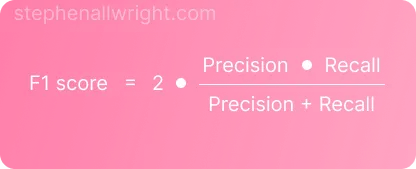</div> 

**What is AUC?**
<br>AUC, or ROC AUC, stands for Area Under the Receiver Operating Characteristic Curve. The score it produces ranges from 0.5 to 1 where 1 is the best score and 0.5 means the model is as good as random.

The metric is calculated as the area underneath the Receiver Operating Characteristic Curve (ROC). The ROC is a graph which maps the relationship between the true positive rate (TPR) of the model and the false positive rate (FPR). It shows at various intervals the TPR that we can expect to receive for a given trade-off with FPR.

The area under this ROC curve, AUC, **<font color='red'>therefore equates to the model’s ability to predict classes correctly</font>**, as a large amount of area would show that the model can achieve a high true positive rate with a correspondingly low false positive rate.

To illustrate this, let’s look at an illustration of the metric:
<div>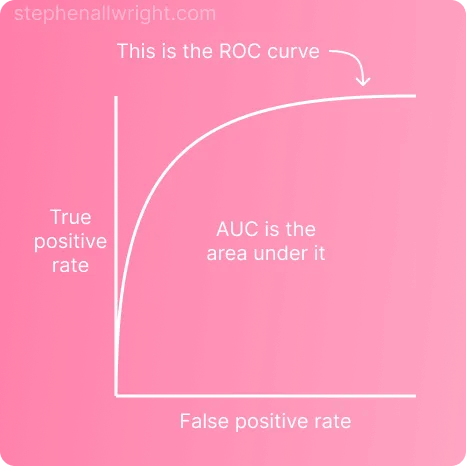</div> 



## <font color='red'>What is the difference between F1 and AUC? The key differences between F1 and AUC are how they handle imbalanced datasets, the input they take, and their approach to calculating the resulting metrics.</font>

**Difference between F1 and AUC metric definitions**
<br>The way these two metrics are calculated are very different. AUC is the area under the ROC curve which is calculated at thresholds between the True Positive Rate and the False Positive Rate, whilst F1 is a straight forward calculation involving the overall recall and precision of the model.

In this regard they are extremely different and tackle the problem of assessing performance from very different angles.

**Difference between prediction inputs for F1 and AUC**
<br>Another difference between F1 and AUC is the inputs they take. F1 requires predicted classes whilst AUC needs the predicted probabilities.

Because of this you will need to define the probability boundary between classes before using F1, unlike with AUC, and you will find that your F1 score changes depending on where it is set.

**<font color='red'>F1 score vs AUC on imbalanced datasets</font>** <br>
<font color='red'>The last but possibly most important difference to be aware of is their behaviour on imbalanced datasets. AUC does not perform well on imbalanced datasets which often leads to misleading results, whilst F1 is still able to measure performance objectively when the class balance is skewed.</font>

## When should I use F1 or AUC?

Now that we have looked at their key differences, how does this impact when you should use one or the other?

<font color='red'>F1 should be used for situations when you either have an imbalanced dataset or you need to communicate your results to end users, due to the relatively simple definition of F1 in comparison with AUC. AUC should be used when you have a balanced dataset or you don’t want to set a probability boundary between classes, which is required for F1.</font>

## Is AUC better than F1 score?

The metric which is best depends on your use case and the dataset, but if one of either F1 or AUC had to be recommended then I would suggest F1 score. It is the go-to metric for classification models, and will provide reliable scores for a wide array of projects due to it’s performance on imbalanced datasets and it’s simpler interpretability.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, ComplementNB

import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn import set_config
set_config(display='diagram')

# LogisticRegression

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
- class_weightdict or ‘balanced’, default=None

In [18]:
lgr = LogisticRegression(solver='liblinear',class_weight='balanced',max_iter=500,random_state=2022)
model_lgr = lgr.fit(X_train, y_train)
report_loss_cf('LogisticRegression', model_lgr, X_train, y_train, X_test, y_test, graph=0)

Model performance for:  LogisticRegression
train set accuracy: 0.899
train set f1 score: 0.786
training set AUC score: 0.966

test set accuracy: 0.801
test set f1 score: 0.595
test set AUC score: 0.845


In [19]:
lgr.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2022,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

The “saga” solver is often the best choice. The “liblinear” solver is used by default for historical reasons.
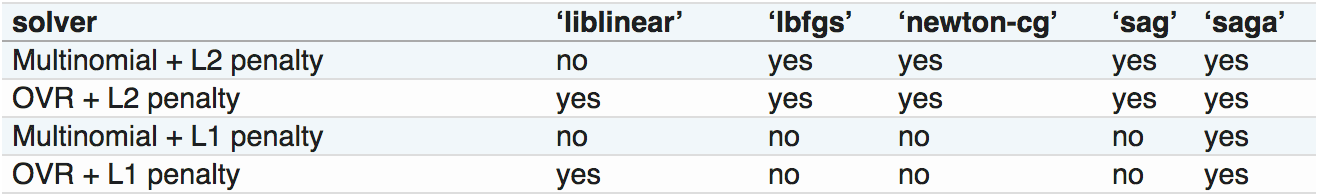

# RandomForestClassifier

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [20]:
rfc=RandomForestClassifier(class_weight='balanced',random_state=2022)
model_rfc = rfc.fit(X_train, y_train)
report_loss_cf('RandomForestClassifier', model_rfc, X_train, y_train, X_test, y_test, graph=0)

Model performance for:  RandomForestClassifier
train set accuracy: 0.996
train set f1 score: 0.990
training set AUC score: 1.000

test set accuracy: 0.874
test set f1 score: 0.601
test set AUC score: 0.877


In [21]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2022,
 'verbose': 0,
 'warm_start': False}

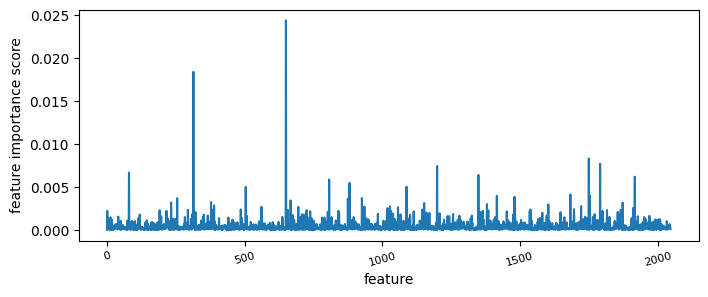

In [22]:
importance = model_rfc.feature_importances_

plt.figure(figsize=(8,3))
plt.plot(importance)
plt.xlabel('feature')
plt.ylabel('feature importance score')
plt.xticks(fontsize=8, rotation=15)
plt.show()

In [23]:
# Construct Data Frame of top 10 features
def plot_feature_importance(model):
    importance = pd.DataFrame(
        {
            'Feature': model.feature_names_in_,
            'Score': model.feature_importances_
            }
        )
    importance.sort_values(by='Score', ascending=False, inplace=True)
    top_importance = importance[:10]
    print(top_importance)
    plt.figure(figsize=(4,3))
    sns.set(style="white", palette="muted", color_codes=True)
    sns.barplot(
        y='Feature', 
        x='Score', 
        data=top_importance, 
        orient='h', 
        color='b'
    ).set(title='Feature importance')

       Feature     Score
650    Bit_650  0.024431
314    Bit_314  0.018437
1750  Bit_1750  0.008360
1791  Bit_1791  0.007739
1199  Bit_1199  0.007477
80      Bit_80  0.006722
1349  Bit_1349  0.006430
1917  Bit_1917  0.006234
807    Bit_807  0.005912
881    Bit_881  0.005503


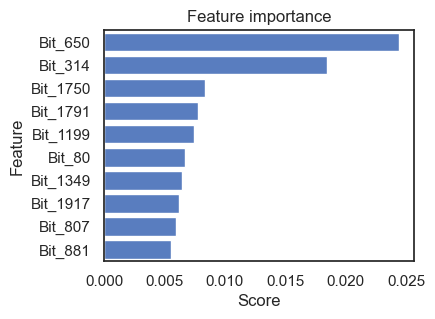

In [24]:
plot_feature_importance(model_rfc)

# GradientBoostingClassifier

class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
- sample_weight

In [25]:
gbc=GradientBoostingClassifier(random_state=2022)
model_gbc = gbc.fit(X_train, y_train)
report_loss_cf('GradientBoostingClassifier',model_gbc,X_train,y_train,X_test,y_test,graph=0)

Model performance for:  GradientBoostingClassifier
train set accuracy: 0.862
train set f1 score: 0.522
training set AUC score: 0.884

test set accuracy: 0.856
test set f1 score: 0.497
test set AUC score: 0.842


In [26]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 2022,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# XGBClassifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
- In general, we tend to set scale_pos_weight proportionally to the imbalance. For example, if 20% of the images contain a cat, we would set scale_positive_weight to 4.

In [27]:
xgbc=XGBClassifier(scale_pos_weight=4, random_state=2022)
model_xgbc = xgbc.fit(X_train, y_train)
report_loss_cf('XGBClassifier', model_xgbc, X_train, y_train, X_test, y_test, graph=0)

Model performance for:  XGBClassifier
train set accuracy: 0.941
train set f1 score: 0.867
training set AUC score: 0.987

test set accuracy: 0.840
test set f1 score: 0.639
test set AUC score: 0.871


In [28]:
xgbc.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 4,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

# LGBMClassifier

classlightgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=None, importance_type='split', **kwargs)

In [29]:
light=LGBMClassifier(objective='binary',class_weight='balanced',random_state=2022)
model_light = light.fit(X_train, y_train)
report_loss_cf('LightGBMClassifier', model_light, X_train, y_train, X_test, y_test, graph=0)

Model performance for:  LightGBMClassifier
train set accuracy: 0.907
train set f1 score: 0.798
training set AUC score: 0.970

test set accuracy: 0.834
test set f1 score: 0.640
test set AUC score: 0.873


# CatBoostClassifier

{'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 1, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'Logloss', 'learning_rate': 0.0028669999446719885, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_estimation_iterations': 10, 'bootstrap_type': 'MVS', 'max_leaves': 64}

In [30]:
cat=CatBoostClassifier(auto_class_weights='Balanced', verbose=False)
model_cat = cat.fit(X_train, y_train)
report_loss_cf('CatBoostClassifier', model_cat, X_train, y_train, X_test, y_test, graph=0)

/Users/xiaofwu-m1/opt/anaconda3/lib/python3.9/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Model performance for:  CatBoostClassifier
train set accuracy: 0.914
train set f1 score: 0.811
training set AUC score: 0.970

test set accuracy: 0.835
test set f1 score: 0.639
test set AUC score: 0.876


/Users/xiaofwu-m1/opt/anaconda3/lib/python3.9/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


# Support Vector Classification

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [31]:
#very slow
svc=SVC(kernel='linear', class_weight='balanced',probability=True)
model_svc = svc.fit(X_train, y_train)
report_loss_cf('Support Vector Classifier', model_svc, X_train, y_train, X_test, y_test, graph=0)

Model performance for:  Support Vector Classifier
train set accuracy: 0.910
train set f1 score: 0.810
training set AUC score: 0.960

test set accuracy: 0.785
test set f1 score: 0.568
test set AUC score: 0.820


# BernoulliNB Naive Bayes Classifier
- good for binary classification

class sklearn.naive_bayes.BernoulliNB(*, alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)

In [32]:
bnbc=BernoulliNB()
model_bnbc = bnbc.fit(X_train, y_train)
report_loss_cf('BernoulliNB Naive Bayes Classifier', model_bnbc, X_train, y_train, X_test, y_test, graph=0)

Model performance for:  BernoulliNB Naive Bayes Classifier
train set accuracy: 0.824
train set f1 score: 0.607
training set AUC score: 0.856

test set accuracy: 0.799
test set f1 score: 0.564
test set AUC score: 0.823


# KNeighborsClassifier

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [33]:
knc=KNeighborsClassifier(weights='distance')
model_knc = knc.fit(X_train, y_train)
report_loss_cf('KNeighborsClassifier', model_knc, X_train, y_train, X_test, y_test, graph=0)

Model performance for:  KNeighborsClassifier
train set accuracy: 0.996
train set f1 score: 0.990
training set AUC score: 1.000

test set accuracy: 0.859
test set f1 score: 0.561
test set AUC score: 0.819


|Method|Train f1|Train AUC|Train accuracy|Test f1|Test AUC|Test accuracy|
|----------|:---:|:--------:|:---------:|:------:|:--:|:----:|
|CatBoost Classifier|0.806|0.971|0.911|0.647|0.872|0.843|
|XGBoost Classifier|0.866|0.987|0.941|0.645|0.860|0.848|
|LightGBM Classifier|0.802|0.972|0.908|0.634|0.870|0.834|
|Logistic Regression|0.785|0.967|0.898|0.605|0.839|0.816|
|RandomForest Classifier|0.991|0.999|0.997|0.577|0.873|0.868|
|Support Vector Classifier|0.808|0.962|0.910|0.577|0.816|0.799|
|BernoulliNB Naive Bayes Classifier|0.617|0.856|0.832|0.573|0.830|0.813|
|KNeighbors Classifier|0.991|1.000|0.997|0.544|0.816|0.858|
|GradientBoosting Classifier|0.531|0.888|0.865|0.483|0.846|0.854|

In [34]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [06:19<00:00, 13.09s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.79               0.75     0.75      0.80   
XGBClassifier                      0.88               0.74     0.74      0.87   
BernoulliNB                        0.80               0.74     0.74      0.81   
LinearDiscriminantAnalysis         0.84               0.74     0.74      0.84   
RidgeClassifierCV                  0.85               0.74     0.74      0.85   
RidgeClassifier                    0.85               0.74     0.74      0.85   
LGBMClassifier                     0.87               0.73     0.73      0.86   
LogisticRegression                 0.81               0.72     0.72      0.81   
Perceptron                         0.81               0.72     0.72      0.81   
ExtraTreesClassifier               0.87               0.72     0.72      0.86   
BaggingClassifier           

# <font color='red'>Best choices are catBoost,  XGBoost, and LightGBM Classifier. We need to tune these three model. But need to consider 1) catBoost is not very popular? 2) XGBoost takes significant longer time to train than LightGBM. 3) If similar performance, lightGBM should be chosen as the model

# LightGBM Classifier. We need to tune the model.

classlightgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=None, importance_type='split', **kwargs)

In [35]:
light.get_params()

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'binary',
 'random_state': 2022,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [36]:
light=LGBMClassifier(class_weight='balanced', objective='binary')
model_light = light.fit(X_train, y_train)
report_loss_cf('LightGBMClassifier', model_light, X_train, y_train, X_test, y_test, graph=0)

Model performance for:  LightGBMClassifier
train set accuracy: 0.907
train set f1 score: 0.798
training set AUC score: 0.970

test set accuracy: 0.834
test set f1 score: 0.640
test set AUC score: 0.873


Strategy for overfitting

1. Grow Shallower Trees:
    - Decrease max_depth
    - Decrease num_leaves
    - Increase min_gain_to_split
    - Increase min_data_in_leaf and min_sum_hessian_in_leaf
2. Grow Less Trees
    - Decrease num_iterations
    - Use Early Stopping
    - Consider Fewer Splits
    - Enable Feature Pre-Filtering When Creating Dataset
    - Decrease max_bin or max_bin_by_feature When Creating Dataset
    - Increase min_data_in_bin When Creating Dataset
    - Decrease feature_fraction
    - Decrease max_cat_threshold
3. Use Less Data
    - Use Bagging

### In general, for Better Accuracy: 

- Use large max_bin (may be slower)
- Use small learning_rate with large num_iterations
- Use large num_leaves (may cause over-fitting)
- Use bigger training data
- Try dart

### In general, deal with Over-fitting: 
- Use small max_bin
- Use small num_leaves
- Use min_data_in_leaf and min_sum_hessian_in_leaf
- Use bagging by set bagging_fraction and bagging_freq
- Use feature sub-sampling by set feature_fraction
- Use bigger training data
- Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
- Try max_depth to avoid growing deep tree
- Try extra_trees
- Try increasing path_smooth

In [37]:
# https://dagshub.com/nipdep/How-to-Win-a-Data-Science-Competition-Learn-from-Top-Kagglers/src/master/final_project/srcipts/lightgbm-hyperparameter-optimisation-lb-0-761.ipynb
# Set up HyperParameter search
# We use random search, which is more flexible and more efficient than a grid search

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

NameError: name 'sp_randint' is not defined

In [ ]:

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

gscv = GridSearchCV(estimator= LGBMClassifier(class_weight='balanced',objective='binary'), 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1')
gscv.fit(X_train, y_train)
gscv.best_params_
#Ploting the score for different values of weight
# sns.set_style('whitegrid')
# plt.figure(figsize=(6,4))
# weigh_data = pd.DataFrame({ 'score': gscv.cv_results_['mean_test_score'], 
#                            'weight': (1- weights)})
# sns.lineplot(weigh_data['weight'], weigh_data['score'])
# plt.xlabel('Weight for class 1')
# plt.ylabel('F1 score')
# plt.xticks([round(i/10,1) for i in range(0,11,1)])
# plt.title('Scoring for different class weights', fontsize=18)

# Understanding LightGBM Parameters (and How to Tune Them)(lightGBM usually out-perform XGBoost with larger dataset, i.e. over 10,000 rows)

https://neptune.ai/blog/lightgbm-parameters-guide

## If someone asks you what is the main difference between LightGBM and XGBoost? You can easily say, their difference is in how they are implemented. (lightgbm uses leaf-wise tree growth algorithm whileXGBoost uses depth-wise tree growth. Leaf-wise method allows the trees to converge faster but the chance of over-fitting increases. )

## <font color='red'>The most important lightgbm parameters - Summary of content below 
    
- <font color='red'>objective: Set it binary or multiclass for classification
- <font color='red'>metric: default is null, meaning metric corresponding to specified objective will be used
- <font color='red'>boosting: gbdt, rf, dart, goss. default gbdt works fine most of time
- <font color='red'>lambda_l1: default is 0. [0, ∞]
- <font color='red'>bagging_fraction(subsample): default is 1. [0, 1]. randomly select part of data without resampling
- <font color='red'>bagging_freq: default is 0. [0, ∞]. 0 means disable bagging; k means perform bagging at every k iteration. To enable bagging, bagging_fraction should be set to value smaller than 1.0 as well.
- <font color='red'>num_leaves: default is 31. [1, ∞], max number of leaves in one tree.
- <font color='red'>feature_fraction: default is 1.0. [0,1],if you set it to 0.8, LightGBM will select 80% of features
- <font color='red'>max_depth: default is -1. [-1, ∞]. 
- <font color='red'>max_bin: default is 255. [2, ∞]
- <font color='red'>num_iterations: default is 100. [1, ∞], number of boosting iterations
- <font color='red'>learning_rate: default is 0.1. Typical: 0.05
- <font color='red'>early_stopping_round: default is 0. [0, ∞], model performance, number of iterations, training time.
- <font color='red'>categorical_feature: handle categorical features
- <font color='red'>bagging_freq: default is 0. [0, ∞]. 0 means disable bagging; k means perform bagging at every k iteration. to enable bagging, bagging_fraction should be set to value smaller than 1.0 as well.
- <font color='red'>min_data_in_leaf: default is 20. min_data. can be used to deal with over-fitting

### According to lightGBM documentation, when facing  overfitting you may want to do the following parameter tuning: 

- Use small max_bin
- Use small num_leaves
- Use min_data_in_leaf and min_sum_hessian_in_leaf
- Use bagging by set bagging_fraction and bagging_freq
- Use feature sub-sampling by set feature_fraction
- Use bigger training data
- Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
- Try max_depth to avoid growing deep tree

### Gradient Boosting methods (default is OK)
- lgbm gbdt (gradient boosted decision trees): default, stable and reliable
- Lgbm dart: better accuracy
- Lgbm goss: converge faster

### Regularization Parameters:

- **Lambda_l1 (and lambda_l2)**: control to l1/l2 and along with min_gain_to_split are used to combat over-fitting.
- **num_leaves**: urely num_leaves is one of the most important parameters that controls the complexity of the model. Large num_leaves increases accuracy on the training set and also the chance of getting hurt by overfitting. According to the documentation, one simple way is that num_leaves = 2^(max_depth). **It is necessary to tune num_leaves with the max_depth together.**
- **subsample**: With subsample (or bagging_fraction)  you can specify the percentage of rows used per tree building iteration. That means some rows will be randomly selected for fitting each learner (tree). This improved generalization but also speed of training. **I suggest using smaller subsample values for the baseline models and later increase this value when you are done with other experiments (different feature selections, different tree architecture).**
- **feature_fraction**: Feature fraction or sub_feature deals with column sampling, LightGBM will randomly select a subset of features on each iteration (tree). For example, if you set it to 0.6, LightGBM will select 60% of features before training each tree. There are two usage for this feature:
    - Can be used to speed up training
    - Can be used to deal with overfitting
- **max_depth**: This parameter control max depth of each trained tree. If you use a large value of max_depth, your model will likely be over fit  to the train set. It will have impact on: 
    - The best value for the num_leaves parameter
    - Model Performance
    - Training Time
- **max_bin**: Binning is a technique for representing data in a discrete view(histogram). Lightgbm uses a histogram based algorithm to find the optimal split point while creating a weak learner. Therefore, each continuous numeric feature (e.g. number of views for a video) should be split into discrete bins. If you define max_bin 255 that means we can have a maximum of 255 unique values per feature. Then Small max_bin causes faster speed and large value improves accuracy.

### Training parameters

Training time! When you want to train your model with lightgbm, Some typical issues that may come up when you train lightgbm models are:

- Training is a time-consuming process
- Dealing with Computational Complexity (CPU/GPU RAM constraints)
- Dealing with categorical features
- Having an unbalanced dataset
- The need for custom metrics
- Adjustments that need to be made for Classification or Regression problems
- In this section, we will try to explain those points in detail.

In this section, we will try to explain those points in detail.

- **num_iterations**: Num_iterations specifies the number of boosting iterations (trees to build). The more trees you build the more accurate your model can be at the cost of:
    - Longer training time
    - Higher chance of overfitting
    - Start with a lower number of trees to build a baseline and increase it later when you want to squeeze the last % out of your model.
    - It is recommended to use smaller learning_rate with larger num_iterations. Also, you should use early_stopping_rounds if you go for higher num_iterations to stop your training when it is not learning anything useful.
- **early_stopping_rounds**: This parameter will stop training if the validation metric is not improving after the last early stopping round. That should be defined in pair with a number of iterations. If you set it too large you increase the chance of overfitting (but your model can be better). The rule of thumb is to have it at 10% of your num_iterations.
- **lightgbm categorical_feature**: One of the advantages of using lightgbm is that it can handle categorical features very well.  
- **lightgbm is_unbalance vs scale_pos_weight**: One of the problems you may face in the binary classification problems is how to deal with the unbalanced datasets. Obviously, you need to balance positive/negative samples but how exactly can you do that in lightgbm? There are two parameters in lightgbm that allow you to deal with this issue is_unbalance and scale_pos_weight, but what is the difference between them and How to use them?
    - When you set Is_unbalace: True, the algorithm will try to Automatically balance the weight of the dominated label (with the pos/neg fraction in train set)
    - If you want change scale_pos_weight (it is by default 1 which mean assume both positive and negative label are equal) in case of unbalance dataset you can use following formula(based on this issue on lightgbm repository) to set it correctly: sample_pos_weight = number of negative samples / number of positive samples
- **lgbm feval**: Sometimes you want to define a custom evaluation function to measure the performance of your model you need to create a feval function. 

### classification params vs regression params

Note for Classification:

- objective: Set it binary or multiclass
- metric: Binary_logloss or AUC or etc.
- is_unbalance: True or False
- scale_pos_weight: used only in binary and multi class applications
- num_class: used only in multi-class classification application

In [ ]:
# def morgan_fingerprint(smiles:str,radius:int=2,num_bits:int=2048,use_counts:bool = False):
#     """
#     Generates a morgan fingerprint for a smiles string.

#     :param smiles: A smiles string for a molecule.
#     :param radius: The radius of the fingerprint.
#     :param num_bits: The number of bits to use in the fingerprint.
#     :param use_counts: Whether to use counts or just a bit vector for the fingerprint
#     :return: A 1-D numpy array containing the morgan fingerprint.
#     """
#     if type(smiles) == str:
#         mol = Chem.MolFromSmiles(smiles)
#     else:
#         mol = smiles
#     if use_counts:
#         fp_vect = AllChem.GetHashedMorganFingerprint(mol, radius, nBits=num_bits)
#     else:
#         fp_vect = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=num_bits)
        
#     fp = np.zeros((1,))
#     DataStructs.ConvertToNumpyArray(fp_vect, fp)

#     return fp 

In [ ]:
# def calcFingerprints(smiles):
#     m1 = Chem.MolFromSmiles(smiles)
#     fp = AllChem.GetMorganFingerprintAsBitVect(m1,2, nBits=2048)
#     binary = fp.ToBitString()
    
#     return list(binary)

In [ ]:
# class Fingerprint_Transformer(object):
    
#     def fit(self, X, y=None):
#         pass
    
#     def transform(self, X, y=None):
        
#     fp_name = [f'Bit_{i}' for i in range(2048)]
# fp_cmpd = []
# for smiles in df.SMILES.tolist():
#     cmpd = Chem.MolFromSmiles(smiles)
#     fp = AllChem.GetMorganFingerprintAsBitVect(cmpd,2, nBits=2048)
#     binary = fp.ToBitString()
#     fp_cmpd.append(list(binary))    
        
#   df_fp = pd.DataFrame(fp_cmpd, index = df.SMILES, columns=fp_name)
# df_fp.shape      
        
#         return pd.DataFrame(res)
    
#     def fit_transform(self, X, y=None):
#         self.fit(X)
#         return self.transform(X) 
    
#     def calcFingerprints(smiles):
#         m1 = Chem.MolFromSmiles(smiles)
#         fp = AllChem.GetMorganFingerprintAsBitVect(m1,2, nBits=2048)
#         binary = fp.ToBitString()
#     return list(binary)